In [277]:
import pandas as pd
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.metrics import accuracy_score
import numpy as np
from wifi import Cell
from mlxtend.plotting import plot_decision_regions
import seaborn as sns
from sklearn.preprocessing import LabelEncoder


 Estrutura Dataset

| RedeA 	| RedeB 	| RedeC 	| classe 	|
|:-----:	|:-----:	|:-----:	|:------:	|
|   40  	|   70  	|   20  	| quarto 	|
|   85  	|   65  	|   0   	|  sala  	|

In [278]:
wifis = pd.read_csv('../data/dataset.csv')
wifis.head(100)

,classe,Espindola_2.4G,BEATRIZ,NET 2G,#NET-CLARO-WIFI,Oi_93B7,TOPNET 99255-7919 GT SURF,ARTHUR,2G.MIMO.BEBY,GVT-53AA,...,CGU-V3208,70mai_Pro Plus+_8eb4,moto g(6) plus 3609,WIFI GLOBAL,NICOLAS,@Casadatapioca,Parangaricutirimirruaro,net-325,VIVO-FCA1,FARMA POPULAR
0,sala,68,43,29,30,27,33,27,24,26,...,0,0,0,0,0,0,0,0,0,0
1,sala,67,35,30,31,24,32,25,22,0,...,0,0,0,0,0,0,0,0,0,0
2,sala,63,45,33,31,27,32,22,24,0,...,0,0,0,0,0,0,0,0,0,0
3,sala,64,36,33,32,30,29,22,25,0,...,0,0,0,0,0,0,0,0,0,0
4,sala,66,42,33,32,26,29,26,25,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
77,varanda,44,56,52,51,40,51,19,31,33,...,0,0,0,0,0,0,0,0,27,27
78,quarto,62,34,42,41,27,25,22,24,0,...,0,0,0,0,0,0,0,0,0,0
79,quarto,55,32,27,28,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
80,quarto,52,33,29,29,22,25,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [279]:
y = wifis['classe']
x = wifis.drop('classe', axis=1)
print('claase' not in x.columns)
print(len(x.columns))
print(x.columns)
print(x.shape[1])

True
29
Index(['Espindola_2.4G', 'BEATRIZ', 'NET 2G', '#NET-CLARO-WIFI', 'Oi_93B7',
       'TOPNET 99255-7919 GT SURF', 'ARTHUR', '2G.MIMO.BEBY', 'GVT-53AA',
       'CONVENIENCIA_TORTUGA', 'WIFI GLOBAL 227', 'Redmi Note 9S',
       'Galaxy A20s6468', '2313_Oi_Fibra', 'Araujo', 'A304_Oi_Fibra 2.4G',
       'ViperNet_Salão ', 'Figueiredo 2.4', 'Salvato', 'CGU-V3208',
       '70mai_Pro Plus+_8eb4', 'moto g(6) plus 3609', 'WIFI GLOBAL', 'NICOLAS',
       '@Casadatapioca', 'Parangaricutirimirruaro', 'net-325', 'VIVO-FCA1',
       'FARMA POPULAR'],
      dtype='object')
29


In [280]:
std_sacler = StandardScaler()
x_normalize = std_sacler.fit_transform(x)
label_encoder = LabelEncoder()
# Converting string labels into numbers.
comodos_codificados=label_encoder.fit_transform(y)
len(comodos_codificados)

82

In [303]:
sss = StratifiedShuffleSplit(n_splits=10, test_size=0.2, random_state=0)
lacc = []
for i in range(1,11):
    model = KNeighborsClassifier(n_neighbors=i,p=1)
    for train_index,test_index in sss.split(x_normalize,y):
        xtrain = x_normalize[train_index]
        ytrain = y[train_index]
        xtest  = x_normalize[test_index]
        ytest  = y[test_index]
        model.fit(xtrain,ytrain)
        ypred=model.predict(xtest)
        acc = accuracy_score(ytest,ypred)
        print(f'accuracy_score {acc} para numero de vizinhos {i} ')
        lacc.append(acc)
    print(f"Média: %4.3f Std: %4.3f para {i} vizinhos "%(np.mean(lacc),np.std(lacc)))
    print('_____________________________________________________________________________________________________________________________________')

accuracy_score 0.8823529411764706 para numero de vizinhos 1 
accuracy_score 0.8235294117647058 para numero de vizinhos 1 
accuracy_score 0.9411764705882353 para numero de vizinhos 1 
accuracy_score 0.9411764705882353 para numero de vizinhos 1 
accuracy_score 0.7647058823529411 para numero de vizinhos 1 
accuracy_score 0.9411764705882353 para numero de vizinhos 1 
accuracy_score 1.0 para numero de vizinhos 1 
accuracy_score 0.9411764705882353 para numero de vizinhos 1 
accuracy_score 0.8235294117647058 para numero de vizinhos 1 
accuracy_score 0.8823529411764706 para numero de vizinhos 1 
Média: 0.894 Std: 0.069 para 1 vizinhos 
_____________________________________________________________________________________________________________________________________
accuracy_score 0.8823529411764706 para numero de vizinhos 2 
accuracy_score 0.8235294117647058 para numero de vizinhos 2 
accuracy_score 1.0 para numero de vizinhos 2 
accuracy_score 0.8823529411764706 para numero de vizinhos 2 
a

In [282]:
sss = StratifiedShuffleSplit(n_splits=10, test_size=0.2, random_state=0)
lacc = []
model = KNeighborsClassifier(n_neighbors=3)
for train_index,test_index in sss.split(x_normalize,y):
    xtrain = x_normalize[train_index]
    ytrain = y[train_index]
    xtest  = x_normalize[test_index]
    ytest  = y[test_index]
    model.fit(xtrain,ytrain)
    ypred=model.predict(xtest)
    acc = accuracy_score(ytest,ypred)
    print(f'accuracy_score {acc} para numero de vizinhos {4} ')
    lacc.append(acc)
print(f"Média: %4.3f Std: %4.3f para {i} vizinhos "%(np.mean(lacc),np.std(lacc)))

accuracy_score 0.8823529411764706 para numero de vizinhos 4 
accuracy_score 0.8823529411764706 para numero de vizinhos 4 
accuracy_score 0.9411764705882353 para numero de vizinhos 4 
accuracy_score 0.9411764705882353 para numero de vizinhos 4 
accuracy_score 0.7647058823529411 para numero de vizinhos 4 
accuracy_score 1.0 para numero de vizinhos 4 
accuracy_score 0.9411764705882353 para numero de vizinhos 4 
accuracy_score 0.9411764705882353 para numero de vizinhos 4 
accuracy_score 0.8823529411764706 para numero de vizinhos 4 
accuracy_score 0.9411764705882353 para numero de vizinhos 4 
Média: 0.912 Std: 0.060 para 10 vizinhos 


<AxesSubplot:>

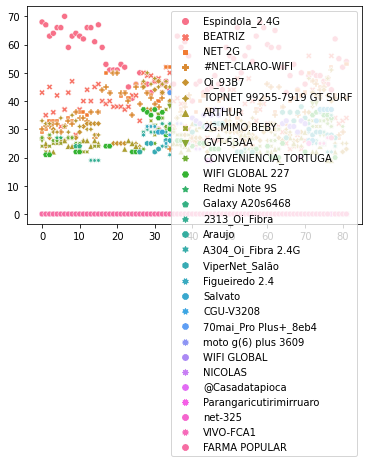

In [283]:
sns.scatterplot(data=wifis)


     Script para teste do  modelo

In [313]:
wifi_force = []
wifis_moment = list(Cell.all('wlp3s0'))
#print(wifis_moment)
for wifiss in wifis_moment:
    print(wifiss.frequency)
    if(str.startswith(wifiss.frequency,'2')):
        print(wifiss.ssid)
        quality_clean = str(wifiss.quality).split('/')
        wifi_force.append(int(quality_clean[0]))
number_zeros = len(wifi_force) - x.shape[1]
number_zeros = np.abs(number_zeros)
array_zeros =  number_zeros * [0]
wifi_force = wifi_force + array_zeros
result = model.predict([wifi_force])
print(f'O comodo que você está é: {result[0]}')




2.452 GHz
Espindola_2.4G
5.18 GHz
2.417 GHz
ARTHUR
2.437 GHz
BEATRIZ
5.745 GHz
O comodo que você está é: sala
